In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [397]:
df = pd.read_csv("DIAMOND.csv")
df

,SL,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE,PRICE,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [398]:
df.shape

(53940, 11)

In [399]:
df.dtypes

SL           int64
CARAT      float64
CUT         object
COLOR       object
CLARITY     object
DEPTH      float64
TABLE      float64
PRICE        int64
X          float64
Y          float64
Z          float64
dtype: object

**Missing Value Handling**

In [400]:
df.isnull().sum()

SL         0
CARAT      9
CUT        8
COLOR      4
CLARITY    0
DEPTH      0
TABLE      0
PRICE      0
X          0
Y          0
Z          0
dtype: int64

In [401]:
#Numerical Missing value handling
df.CARAT.fillna(df.CARAT.mean(), inplace=True)

In [402]:
#Categorical Missing value handling
df.CUT.value_counts()

Ideal        21543
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: CUT, dtype: int64

In [403]:
df.CUT.fillna("Ideal", inplace=True)

In [404]:
df.COLOR.value_counts()

G    11288
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: COLOR, dtype: int64

In [405]:
df.COLOR.fillna("G", inplace=True)

In [406]:
df.isnull().sum()

SL         0
CARAT      0
CUT        0
COLOR      0
CLARITY    0
DEPTH      0
TABLE      0
PRICE      0
X          0
Y          0
Z          0
dtype: int64

In [407]:
df

,SL,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE,PRICE,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [408]:
df.describe()

,SL,CARAT,DEPTH,TABLE,PRICE,X,Y,Z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.798022,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.473968,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [409]:
#Dropping dimentionless diamonds

df = df.drop(df[df["X"]==0].index)
df = df.drop(df[df["Y"]==0].index)
df = df.drop(df[df["Z"]==0].index)
df.shape

(53920, 11)

In [410]:
#Dropping the outliers

df = df[(df["DEPTH"] < 75) & (df["DEPTH"] > 45)]
df = df[(df["TABLE"] < 80) & (df["TABLE"] > 40)]
df = df[(df["X"] < 30)]
df = df[(df["Y"] < 30)]
df = df[(df["Z"] < 30) & (df["Z"] > 2)]
df.shape

(53907, 11)

In [411]:
#ax=sns.pairplot(df, hue= "CUT", height = 4)

In [412]:
# Get list of categorical variables

catagorical = (df.dtypes == "object")
object_cols = list(catagorical[catagorical].index)
print("Categorical variables:", object_cols)

Categorical variables: ['CUT', 'COLOR', 'CLARITY']


**Boxplot**

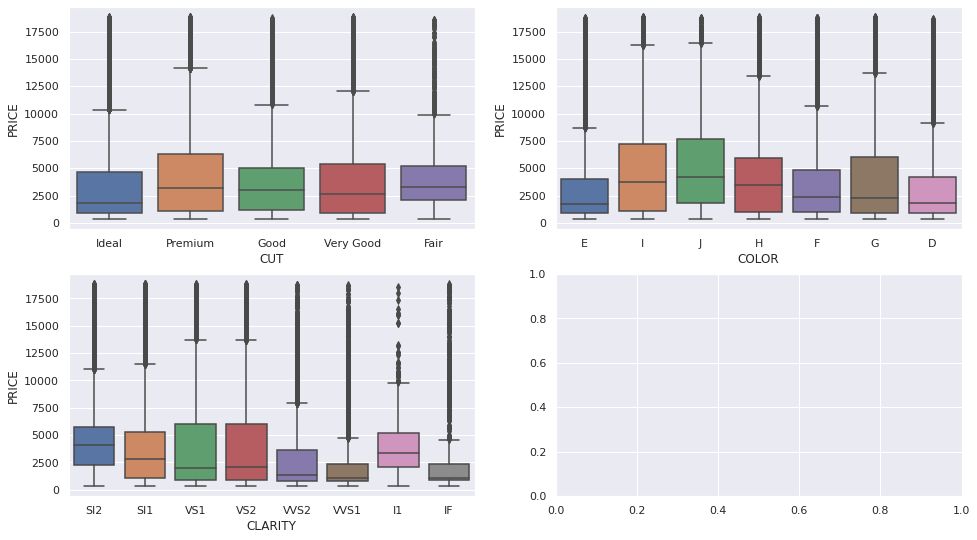

In [413]:
fig, axis = plt.subplots(2, 2, figsize = (16, 9))
sns.boxplot(y = "PRICE", x= "CUT", data=df, orient = "v", ax=axis[0, 0])
sns.boxplot(y = "PRICE", x= "COLOR", data=df, orient = "v", ax=axis[0, 1])
sns.boxplot(y = "PRICE", x= "CLARITY", data=df, orient = "v", ax=axis[1, 0])
plt.show()

**Violinplot**

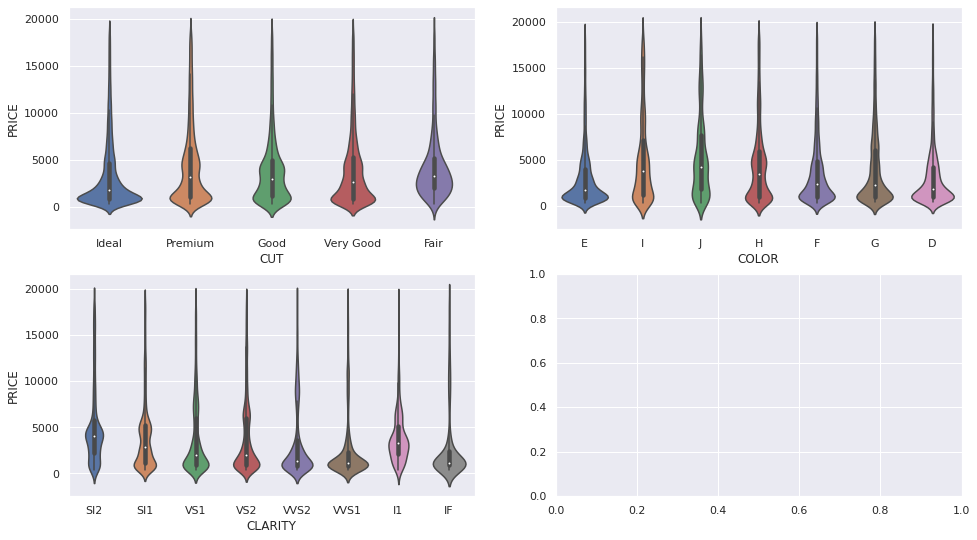

In [414]:
fig, axis = plt.subplots(2, 2, figsize = (16, 9))
sns.violinplot(y = "PRICE", x= "CUT", data=df, orient = "v", ax=axis[0, 0])
sns.violinplot(y = "PRICE", x= "COLOR", data=df, orient = "v", ax=axis[0, 1])
sns.violinplot(y = "PRICE", x= "CLARITY", data=df, orient = "v", ax=axis[1, 0])
plt.show()

**Label Encoding**

In [415]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df.CUT = LE.fit_transform(df.CUT)
df.COLOR = LE.fit_transform(df.COLOR)
df.CLARITY = LE.fit_transform(df.CLARITY)

In [416]:
df

,SL,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE,PRICE,X,Y,Z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


**Heatmap**

[]

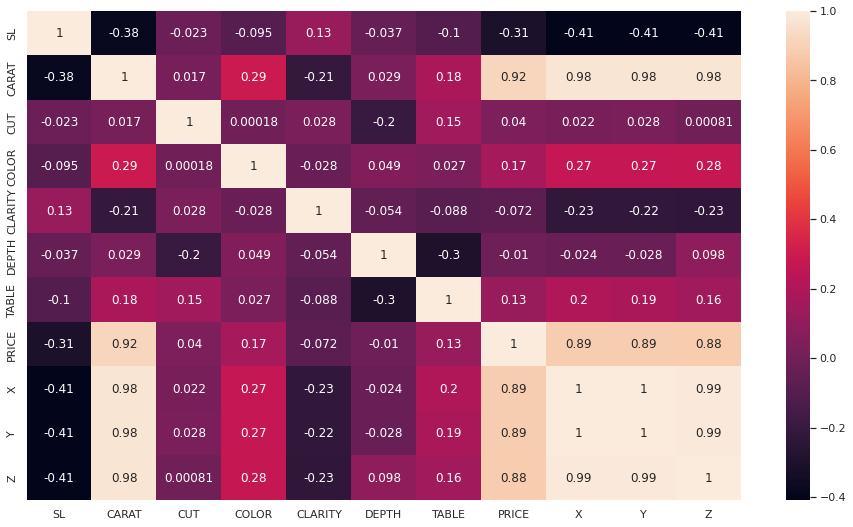

In [417]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot = True)
plt.plot()

In [418]:
x = df.drop(["PRICE"],axis =1)
y = df["PRICE"]

In [419]:
x

,SL,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE,X,Y,Z
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [420]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

**Feature Engineering**

In [421]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [422]:
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(x, y)

SelectKBest()

In [423]:
fs = pd.DataFrame(fit_features.scores_, index = x.columns, columns= ["score values"])
fs

,score values
SL,1384.358558
CARAT,81.012925
CUT,1.219470
COLOR,2.309863
CLARITY,2.210048
DEPTH,1.213404
TABLE,1.330644
X,95.726776
Y,99.996777
Z,85.126172


In [424]:
fs.nlargest(10, "score values")

,score values
SL,1384.358558
Y,99.996777
X,95.726776
Z,85.126172
CARAT,81.012925
COLOR,2.309863
CLARITY,2.210048
TABLE,1.330644
CUT,1.219470
DEPTH,1.213404


In [425]:
x = df.drop(["SL"], axis=1)
x = df.drop(["DEPTH"], axis=1)
x = df.drop(["CUT"], axis=1)
x = df.drop(["TABLE"], axis=1)

In [426]:
x

,SL,CARAT,CUT,COLOR,CLARITY,DEPTH,PRICE,X,Y,Z
0,1,0.23,2,1,3,61.5,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,2757,6.15,6.12,3.74


**Linear Regression**

In [427]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [428]:
LR.fit(x_train, y_train)

LinearRegression()

In [429]:
LR_score = LR.score(x_test, y_test) * 100
LR_score

88.96101726090735

In [430]:
LR.predict(x_test)

array([  798.23071096,   264.34548433,  3932.45186417, ...,
        1067.98659029,  7969.55161217, -1174.62425197])

In [431]:
y_test

33909     844
31041     750
2443     3187
36036     923
30597     734
         ... 
18569    7574
41382    1221
41316    1214
10187    4737
43271     506
Name: PRICE, Length: 10782, dtype: int64

**Decision Tree Regression**

In [432]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [433]:
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [434]:
DTR_score = DTR.score(x_test, y_test) * 100
DTR_score

99.99176333349453

In [435]:
DTR.predict(x_test)

array([ 844.,  750., 3187., ..., 1214., 4737.,  506.])

**Random Forest Regression**

In [436]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [388]:
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [389]:
RFR_score = RFR.score(x_test, y_test) * 100
RFR_score

99.99561639140363

In [390]:
RFR.predict(x_test)

array([13586.2 ,  7279.27,   733.62, ...,   619.94,   484.56,   651.57])

**KNeighbors Regression**

In [391]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()

In [392]:
KNR.fit(x_train, y_train)

KNeighborsRegressor()

In [393]:
KNR_score = KNR.score(x_test, y_test) * 100
KNR_score

99.59508759977537

In [394]:
KNR.predict(x_test)

array([13581. ,  7278.6,   740. , ...,   621. ,   501.8,   651.4])

**Accuracy Graph**

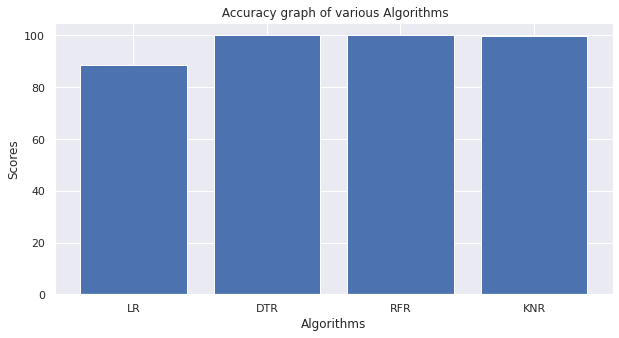

In [395]:
plt.figure(figsize = (10,5))
Model_score = {"LR":LR_score,"DTR":DTR_score, "RFR":RFR_score, "KNR":KNR_score}
name = list(Model_score.keys())
score = list(Model_score.values())
plt.bar(name,score)
plt.title(" Accuracy graph of various Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.show()